In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [10]:
df=pd.read_csv('Advertising.csv')

In [11]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Missing Values

In [10]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

EDA

<AxesSubplot:xlabel='TV', ylabel='sales'>

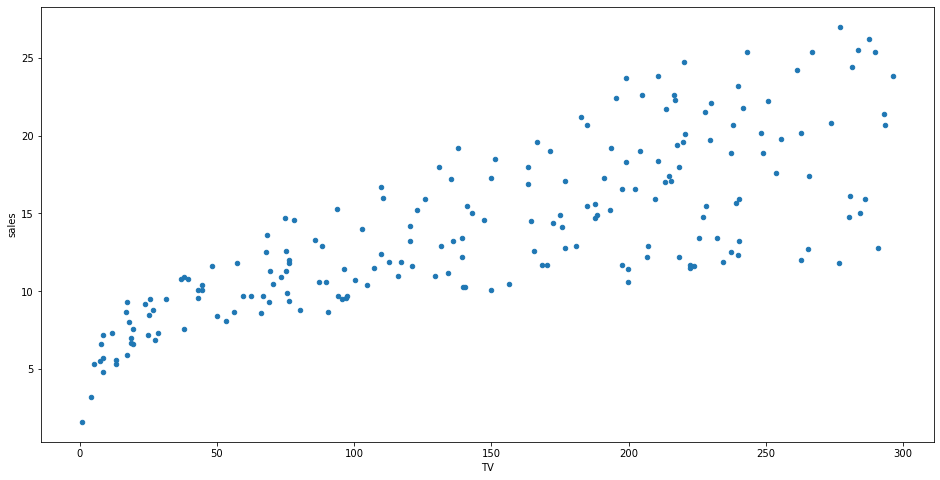

In [25]:
df.plot(kind='scatter',x='TV',y='sales',figsize=(16,8))

<AxesSubplot:xlabel='radio', ylabel='sales'>

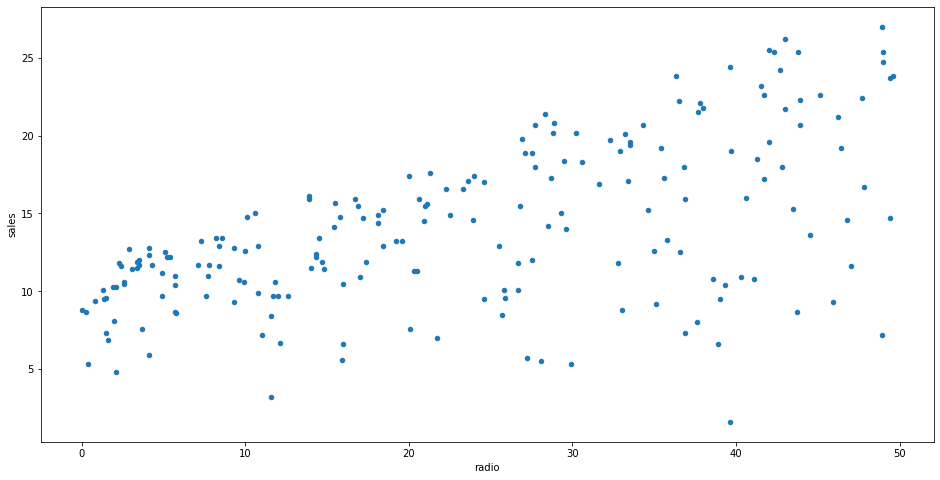

In [27]:
df.plot(kind='scatter',x='radio',y='sales',figsize=(16,8))

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

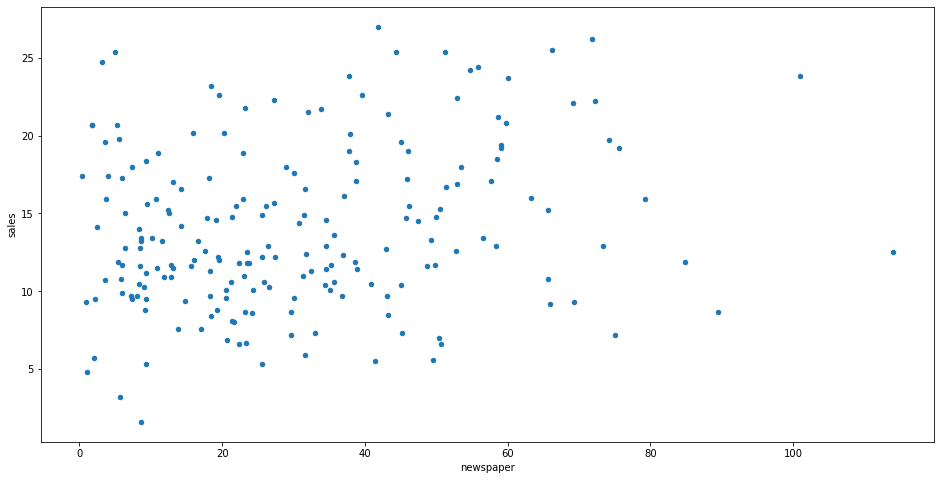

In [28]:
df.plot(kind='scatter',x='newspaper',y='sales',figsize=(16,8))

<AxesSubplot:>

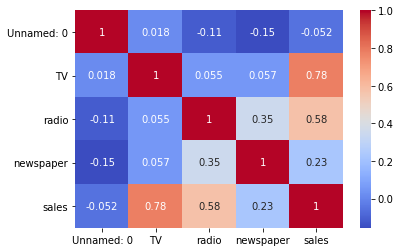

In [13]:
corr=df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

Encoding Unnamed Column

In [24]:
pd.get_dummies(df['Unnamed: 0'],prefix=None)

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
def onehot_encode(df,column,prfix):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=prefix)
    df=df.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [26]:
df=onehot_encode(df, column='Unnamed: 0', prefix='Unnamed: 0')

TypeError: onehot_encode() got an unexpected keyword argument 'prefix'

In [22]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [35]:
x=df['TV']
y=df['sales']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8)

Model Selection

In [59]:
log_model = LogisticRegression()
svm_model = SVC()
dec_model = DecisionTreeClassifier()

In [60]:
np.sum(y)/len(y)

14.0225